## **DATA SCIENCIE CODERHOUSE: COMISIÓN 61750**

Alumno: Alexis Gelpi

### Introducción:

El análisis de los datos de los supermercados, que tiene 39 columnas, nos da la oportunidad de estudiar distintas ideas sobre el comportamiento de los clientes, las ventas y los costos operativos. El objetivo de este proyecto es entender mejor qué factores afectan las ventas y los costos en distintos mercados, para ayudar a las tiendas a mejorar sus estrategias de promoción y a enfocar mejor sus clientes.

### Descripción de la situación:

Los supermercados deben encontrar un equilibrio entre aumentar las ventas y gestionar los costos operativos. También es crucial que comprendan cómo varía el comportamiento de los clientes según factores demográficos y geográficos. Este análisis tiene como objetivo identificar patrones y tendencias que sirvan para crear estrategias de marketing y promociones eficaces, ajustadas a las necesidades particulares de los clientes.

### Objetivo:



El objetivo principal de este análisis es identificar patrones y tendencias que ayuden a los supermercados a mejorar sus estrategias de promoción, ventas y segmentación de clientes. Este proyecto busca generar insights clave para predecir cómo las promociones impactan en las ventas, las variaciones en ventas y costos según la región, las preferencias de compra de clientes con distintos perfiles, el efecto de las características físicas de los supermercados en las ventas, y el crecimiento de las ventas de marcas específicas con el tiempo. Estas predicciones ofrecerán información valiosa para optimizar el marketing, aumentar la eficiencia operativa y personalizar las ofertas para distintos segmentos de clientes.

### Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/code/mayurspawar/customer-acquisition-prediction/data

Este conjunto de datos ofrece información detallada sobre las ventas en supermercados, incluyendo categorías de productos, departamentos, ventas y costos de tienda, promociones, datos demográficos de los clientes y detalles de productos y tiendas. Con esta información, se podrá realizar un análisis profundo y desarrollar modelos predictivos sólidos para mejorar las estrategias de promoción, segmentación de clientes y control de costos, lo que incrementará la eficiencia operativa y la satisfacción del cliente en el sector minorista.

### Importamos librerias y cargamos datos

In [2]:
#Importamos las librerias que deseamos trabajar:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
#Traemos nuestro Dataset desde Gitgub previamente cargado:
url='https://raw.githubusercontent.com/Yegasi14/DATASET-Proyecto-DATA-l/refs/heads/main/media%20prediction%20and%20its%20cost.csv'
df_archivo= pd.read_csv(url, sep=',', header=None)
df_archivo.head()

<ipython-input-3-00e26aa1106c>:3: DtypeWarning: Columns (3,4,5,10,15,17,18,20,21,22,23,24,25,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_archivo= pd.read_csv(url, sep=',', header=None)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
1,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
2,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
3,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
4,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78


### Exploración de datos

In [4]:
#Dimensión inicial del Dataframe
df_archivo.shape

(60429, 40)

Este conjunto de datos contiene 60429 registros y 40 columnas

In [5]:
#Creamos una lista para renombrar las columnas originales con la fila 0:
df_columnas = {0:'food_category',1:'food_department',2:'food_family',3:'store_sales(in millions)',4:'store_cost(in millions)',5:'unit_sales(in millions)',6:'promotion_name',7:'sales_country',8:'marital_status',9:'gender',10:'total_children',11:'education',12:'member_card',13:'occupation',14:'houseowner',15:'avg_cars_at home(approx)',16:'avg. yearly_income',17:'num_children_at_home',18:'avg_cars_at home(approx)',19:'brand_name',20:'SRP',21:'gross_weight',22:'net_weight',23:'recyclable_package',24:'low_fat',25:'units_per_case',26:'store_type',27:'store_city',28:'store_state',29:'store_sqft',30:'grocery_sqft',31:'frozen_sqft',32:'meat_sqft',33:'coffee_bar',34:'video_store',35:'salad_bar',36:'prepared_food',37:'florist',38:'media_type',39:'cost'}
df_columnas

{0: 'food_category',
 1: 'food_department',
 2: 'food_family',
 3: 'store_sales(in millions)',
 4: 'store_cost(in millions)',
 5: 'unit_sales(in millions)',
 6: 'promotion_name',
 7: 'sales_country',
 8: 'marital_status',
 9: 'gender',
 10: 'total_children',
 11: 'education',
 12: 'member_card',
 13: 'occupation',
 14: 'houseowner',
 15: 'avg_cars_at home(approx)',
 16: 'avg. yearly_income',
 17: 'num_children_at_home',
 18: 'avg_cars_at home(approx)',
 19: 'brand_name',
 20: 'SRP',
 21: 'gross_weight',
 22: 'net_weight',
 23: 'recyclable_package',
 24: 'low_fat',
 25: 'units_per_case',
 26: 'store_type',
 27: 'store_city',
 28: 'store_state',
 29: 'store_sqft',
 30: 'grocery_sqft',
 31: 'frozen_sqft',
 32: 'meat_sqft',
 33: 'coffee_bar',
 34: 'video_store',
 35: 'salad_bar',
 36: 'prepared_food',
 37: 'florist',
 38: 'media_type',
 39: 'cost'}

Este diccionario es útil para asignar a los nombres de columnas índices númericos enteros y para renombrar las columnas del dataset para que sea más descriptivo y útil para el análisis de datos.

In [6]:
#Verificamos los valorescon los que deseamos trabajar en nuestro Dataset
# Omitimos la primera fila.
df_Valores=df_archivo.values[1:,:]
df_Valores

array([['Breakfast Foods', 'Frozen Foods', 'Food', ..., '1.0',
        'Daily Paper, Radio', '126.62'],
       ['Breakfast Foods', 'Frozen Foods', 'Food', ..., '1.0',
        'Daily Paper, Radio', '59.86'],
       ['Breakfast Foods', 'Frozen Foods', 'Food', ..., '1.0',
        'Daily Paper, Radio', '84.16'],
       ...,
       ['Specialty', 'Carousel', 'Non-Consumable', ..., 0.0,
        'Sunday Paper, Radio, TV', 67.51],
       ['Specialty', 'Carousel', 'Non-Consumable', ..., 1.0,
        'Sunday Paper', 132.88],
       ['Specialty', 'Carousel', 'Non-Consumable', ..., 1.0,
        'Daily Paper, Radio', 87.76]], dtype=object)

Este código toma los datos del DataFrame, excluye la primera fila y almacena el resto en df_Valores.

In [7]:
#Creamos un nuevo Dataframe con las columnas renombradas:
df=pd.DataFrame(df_Valores,columns=df_columnas)
df.rename(columns=df_columnas,inplace=True)
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.428,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


Se crea un nuevo DataFrame llamado df usando los valores contenidos en df_Valores y las columnas de este serán nombradas según los valores del diccionario df_columnas.

In [8]:
#Verificamos nueva dimensión del Dataframe
df.shape

(60428, 40)

In [9]:
#Hacemos la exploración del tipo de datos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   food_category             60428 non-null  object
 1   food_department           60428 non-null  object
 2   food_family               60428 non-null  object
 3   store_sales(in millions)  60428 non-null  object
 4   store_cost(in millions)   60428 non-null  object
 5   unit_sales(in millions)   60428 non-null  object
 6   promotion_name            60428 non-null  object
 7   sales_country             60428 non-null  object
 8   marital_status            60428 non-null  object
 9   gender                    60428 non-null  object
 10  total_children            60428 non-null  object
 11  education                 60428 non-null  object
 12  member_card               60428 non-null  object
 13  occupation                60428 non-null  object
 14  houseowner            

Se observa que el tipo de datos de las variebles son de tipo object.

VARIABLES POTENCIALMENTE RELEVANTES
Algunas de las variables que podrìan ser relevantes para predecir las estrategias de marketing son: promotion_name, store_sales(in millions), store_cost(in millions), unit_sales(in millions), sales_country, education, store_type, marital_status, brand_name, gender.

In [10]:
#Miramos la descripción de las princiapales medidas de cada columna:
df.describe()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
count,60428,60428,60428,60428.0,60428.00,60428.0,60428,60428,60428,60428,...,60428.0,60428.0,60428.0,60428.0,60428.0,60428.0,60428.0,60428.0,60428,60428.00
unique,45,22,3,1767.0,15073.00,12.0,49,3,2,2,...,40.0,40.0,40.0,4.0,4.0,4.0,4.0,4.0,13,656.00
top,Vegetables,Produce,Food,4.8,2.16,3.0,Weekend Markdown,USA,S,F,...,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,"Daily Paper, Radio",101.84
freq,7440,8521,43284,232.0,52.00,20064.0,2330,38892,30355,30942,...,4134.0,4134.0,4134.0,26967.0,28472.0,25876.0,25876.0,24715.0,6820,587.00


Hay 60428 registros

food_category: Hay 45 categorias de comidas y en el top esta vegetales como mas elegida.

promotion_name: en el top esta Weekend Markdown.

sales_country: de los 3 países identificado en el top esta USA.

In [11]:
#Realizamos la validación de valores nulos como Booleanos
df.isnull().sum().astype(bool)

,0
food_category,False
food_department,False
food_family,False
store_sales(in millions),False
store_cost(in millions),False
unit_sales(in millions),False
promotion_name,False
sales_country,False
marital_status,False
gender,False


Este archivo no contiene valores Nulos

CAMBIAR NOMBRES A COLUMMNAS NO IMPORTAR COLUMNA 18 porque ya es la 15

### Hipótesis planteadas:
1.Las promociones como "Weekend Markdown" incrementan significativamente las ventas unitarias.

2.Estados unidos genera más ventas pero a mayor costo que México y Canadá.

3.Los clientes que tienen nivel educativo más alto tienden a comprar productos en Supermercados de lujo o de tipo Gourmet.

4.La mediana del costo total de ventas de los hombres es mayor al de las mujeres.

5.Los clientes solteros compran más comida congeleda.

6.La mayor tendencia en ventas es la marca Carrington

In [12]:
#Dado que la columna 18 y la 15 originales son las mismas, eliminamos una de las dos:
df = df.drop(df.columns[18], axis=1)

In [13]:
#Nuevas dimensiones del Dataframe:
df.shape

(60428, 38)

In [14]:
df

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.428,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.6,0.496,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [15]:
#Validación de tipos de datos nuevamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   food_category             60428 non-null  object
 1   food_department           60428 non-null  object
 2   food_family               60428 non-null  object
 3   store_sales(in millions)  60428 non-null  object
 4   store_cost(in millions)   60428 non-null  object
 5   unit_sales(in millions)   60428 non-null  object
 6   promotion_name            60428 non-null  object
 7   sales_country             60428 non-null  object
 8   marital_status            60428 non-null  object
 9   gender                    60428 non-null  object
 10  total_children            60428 non-null  object
 11  education                 60428 non-null  object
 12  member_card               60428 non-null  object
 13  occupation                60428 non-null  object
 14  houseowner            

### Mejoras del datasets

**Formateamos columnas a datos de tipo numericos para poder utilizarlas en futuros graficos**

Columna store_cost(in millions)

In [16]:
df['store_cost(in millions)'] = df['store_cost(in millions)'].replace({',': ''}, regex=True)

In [17]:
df['store_cost(in millions)'] = pd.to_numeric(df['store_cost(in millions)'], errors='coerce')

Columna store_sales(in millions)

In [18]:
df['store_sales(in millions)'] = df['store_sales(in millions)'].replace({',': ''}, regex=True)

In [19]:
df['store_sales(in millions)'] = pd.to_numeric(df['store_sales(in millions)'], errors='coerce')

Columna avg. yearly_income

In [20]:
df['avg. yearly_income'] = df['avg. yearly_income'].replace({',': ''}, regex=True)

In [21]:
df['avg. yearly_income'] = pd.to_numeric(df['avg. yearly_income'], errors='coerce')

Columna cost

In [22]:
df['cost'] = df['cost'].replace({',': ''}, regex=True)

In [23]:
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

In [24]:
#Nueva exploración con datos formateados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   store_sales(in millions)  60428 non-null  float64
 4   store_cost(in millions)   60428 non-null  float64
 5   unit_sales(in millions)   60428 non-null  object 
 6   promotion_name            60428 non-null  object 
 7   sales_country             60428 non-null  object 
 8   marital_status            60428 non-null  object 
 9   gender                    60428 non-null  object 
 10  total_children            60428 non-null  object 
 11  education                 60428 non-null  object 
 12  member_card               60428 non-null  object 
 13  occupation                60428 non-null  object 
 14  houseo

In [25]:
df.describe()

,store_sales(in millions),store_cost(in millions),avg. yearly_income,cost
count,60428.000000,60428.000000,0.0,60428.000000
mean,6.541031,2.619460,NaN,99.262366
std,3.463047,1.453009,NaN,30.011257
min,0.510000,0.163200,NaN,50.790000
25%,3.810000,1.500000,NaN,69.650000
50%,5.940000,2.385600,NaN,98.520000
75%,8.670000,3.484025,NaN,126.620000
max,22.920000,9.726500,NaN,149.750000


### Impacto de las promociones de ventas

In [26]:
#Agrupamos las ventas en las tiendas por nombres de la promoción:
sales_by_promotion = df.groupby('promotion_name')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()

In [27]:
print(sales_by_promotion)

             promotion_name  store_sales(in millions)  store_cost(in millions)
0              Bag Stuffers                   6932.32                2767.7471
1              Best Savings                   5454.58                2195.0372
2                 Big Promo                   7503.66                3020.6026
3        Big Time Discounts                   9805.89                3936.3625
4          Big Time Savings                   4995.39                1994.6641
5              Bye Bye Baby                   5554.61                2234.1963
6     Cash Register Lottery                   9821.71                3955.9581
7        Coupon Spectacular                   2350.58                 936.9022
8                 Dimes Off                   7482.87                2998.4700
9            Dollar Cutters                   8478.62                3389.6142
10              Dollar Days                   3461.17                1384.7203
11         Double Down Sale                  11443.0

In [28]:
sales_by_promotion.groupby('promotion_name').describe().fillna(0)

store_sales(in millions)                           \
                                           count      mean  std       min   
promotion_name                                                              
Bag Stuffers                                 1.0   6932.32  0.0   6932.32   
Best Savings                                 1.0   5454.58  0.0   5454.58   
Big Promo                                    1.0   7503.66  0.0   7503.66   
Big Time Discounts                           1.0   9805.89  0.0   9805.89   
Big Time Savings                             1.0   4995.39  0.0   4995.39   
Bye Bye Baby                                 1.0   5554.61  0.0   5554.61   
Cash Register Lottery                        1.0   9821.71  0.0   9821.71   
Coupon Spectacular                           1.0   2350.58  0.0   2350.58   
Dimes Off                                    1.0   7482.87  0.0   7482.87   
Dollar Cutters                               1.0   8478.62  0.0   8478.62   
Dollar Days                                  1.0   3461.17  0.0   3461.17   
Double Down Sale                             1.0  11443.00  0.0  11443.00   
Double Your Savings                          1.0   1583.40  0.0   1583.40   
Fantastic Discounts                          1.0   1149.49  0.0   1149.49   
Free For All                                 1.0  10553.45  0.0  10553.45   
Go For It                                    1.0  10124.34  0.0  10124.34   
Green Light Days                             1.0  11179.51  0.0  11179.51   
Green Light Special                          1.0   2766.31  0.0   2766.31   
High Roller Savings                          1.0  11548.20  0.0  11548.20   
I Cant Believe It Sale                       1.0   6313.63  0.0   6313.63   
Money Savers                                 1.0  10031.30  0.0  10031.30   
Mystery Sale                                 1.0   3341.26  0.0   3341.26   
One Day Sale                                 1.0  11658.77  0.0  11658.77   
Pick Your Savings                            1.0   5736.84  0.0   5736.84   
Price Cutters                                1.0   7050.83  0.0   7050.83   
Price Destroyers                             1.0   9098.54  0.0   9098.54   
Price Savers                                 1.0  15290.61  0.0  15290.61   
Price Slashers                               1.0  11150.16  0.0  11150.16   
Price Smashers                               1.0   2996.86  0.0   2996.86   
Price Winners                                1.0  13925.79  0.0  13925.79   
Sale Winners                                 1.0   5742.73  0.0   5742.73   
Sales Days                                   1.0   7425.76  0.0   7425.76   
Sales Galore                                 1.0   7840.59  0.0   7840.59   
Save-It Sale                                 1.0  13227.02  0.0  13227.02   
Saving Days                                  1.0   8916.86  0.0   8916.86   
Savings Galore                               1.0   6662.80  0.0   6662.80   
Shelf Clearing Days                          1.0  11394.93  0.0  11394.93   
Shelf Emptiers                               1.0   5227.64  0.0   5227.64   
Super Duper Savers                           1.0  12841.17  0.0  12841.17   
Super Savers                                 1.0  12858.23  0.0  12858.23   
Super Wallet Savers                          1.0   2588.79  0.0   2588.79   
Three for One                                1.0   6806.52  0.0   6806.52   
Tip Top Savings                              1.0   5601.89  0.0   5601.89   
Two Day Sale                                 1.0  15201.72  0.0  15201.72   
Two for One                                  1.0   9795.77  0.0   9795.77   
Unbeatable Price Savers                      1.0   7914.11  0.0   7914.11   
Wallet Savers                                1.0   4106.82  0.0   4106.82   
Weekend Markdown                             1.0  15378.81  0.0  15378.81   
You Save Days                                1.0   6945.55  0.0   6945.55   

                   

Hacemos el código:

<Figure size 640x480 with 0 Axes>

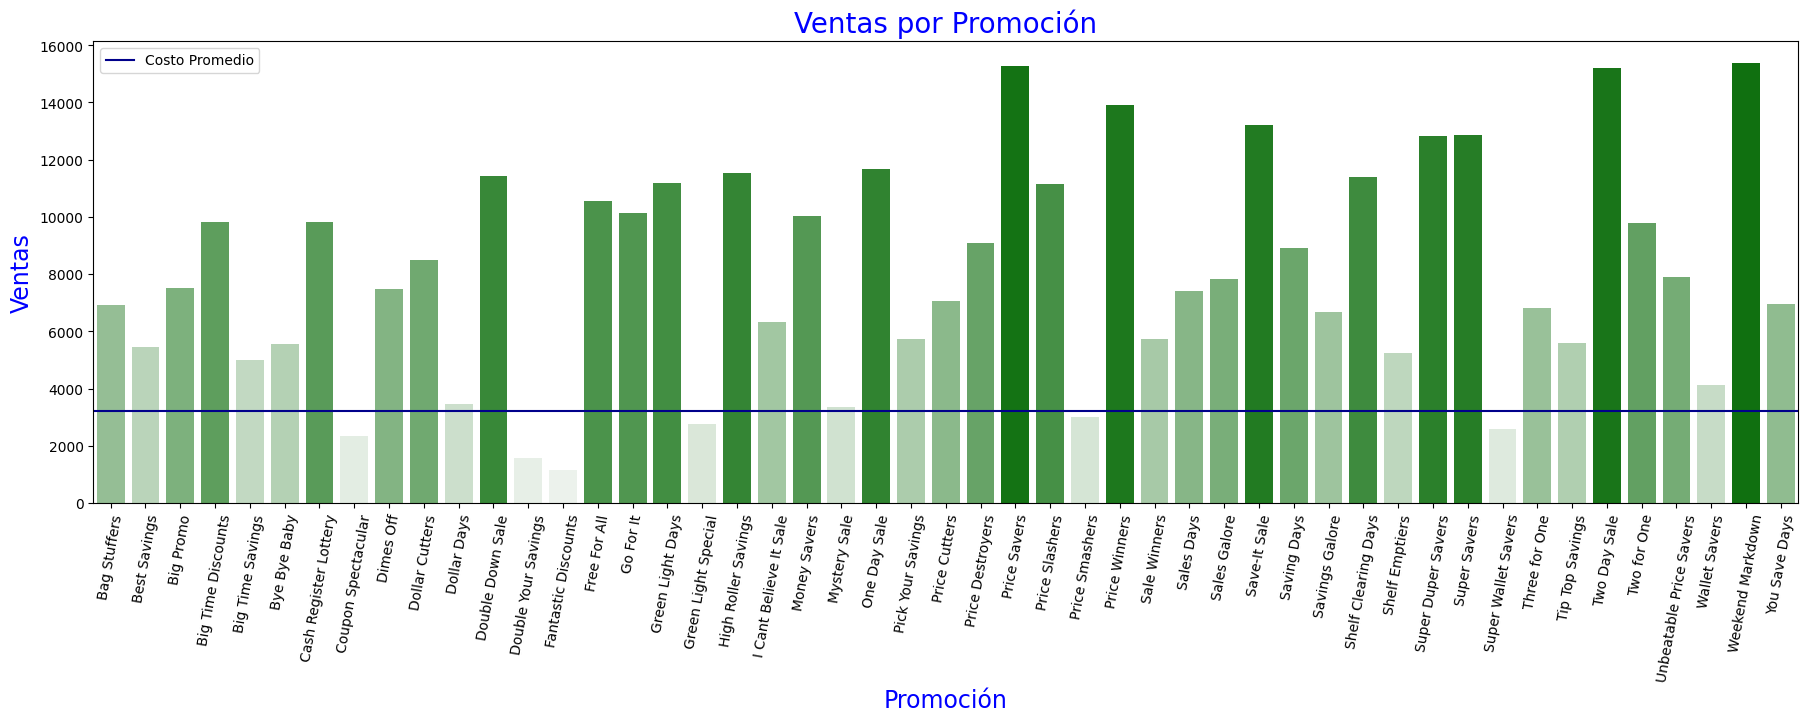

In [151]:
# Extraer los valores de ventas en una variable nueva para el eje y
sales_values = sales_by_promotion['store_sales(in millions)']

# Definir una paleta de colores de verde claro a verde oscuro
palette = sns.light_palette("green", n_colors=len(sales_values))

# Ordenamos el tono de la paleta de menor a mayor
rank = sales_values.argsort().argsort()
palette = np.array(palette)[rank].tolist()

# Creamos la figura
GF1 = plt.figure(figsize=(22, 6))

# Creamos un gráfico de barras con Seaborn
sns.barplot(x='promotion_name', y='store_sales(in millions)',
            hue='promotion_name', data=sales_by_promotion,
            palette=palette, legend=False)

# Configuración de títulos y ejes
plt.title('Ventas por Promoción', color='blue', fontsize=20)
plt.xlabel('Promoción', color='blue', fontsize=17)
plt.ylabel('Ventas', color='blue', fontsize=17)

# Añadimos la línea media en azul oscuro
plt.axhline(y=sales_by_promotion['store_cost(in millions)'].mean(),
            color='darkblue', linestyle='-', label='Costo Promedio')

# Mostrar leyenda
plt.legend()

# Rotación de etiquetas en el eje X
plt.xticks(rotation=80)

# Añadir borde negro al gráfico
plt.gca().spines['top'].set_edgecolor('black')
plt.gca().spines['right'].set_edgecolor('black')
plt.gca().spines['left'].set_edgecolor('black')
plt.gca().spines['bottom'].set_edgecolor('black')

# Mostrar el gráfico
GF1 = plt.show()

Con esta representación gráfica podemos observar las promociones más efectivas en términos de aumento de ventas y midiendo a simple vista con el trazo rojo que promociones están por encima o por debajo del costo promedio.

<Figure size 640x480 with 0 Axes>

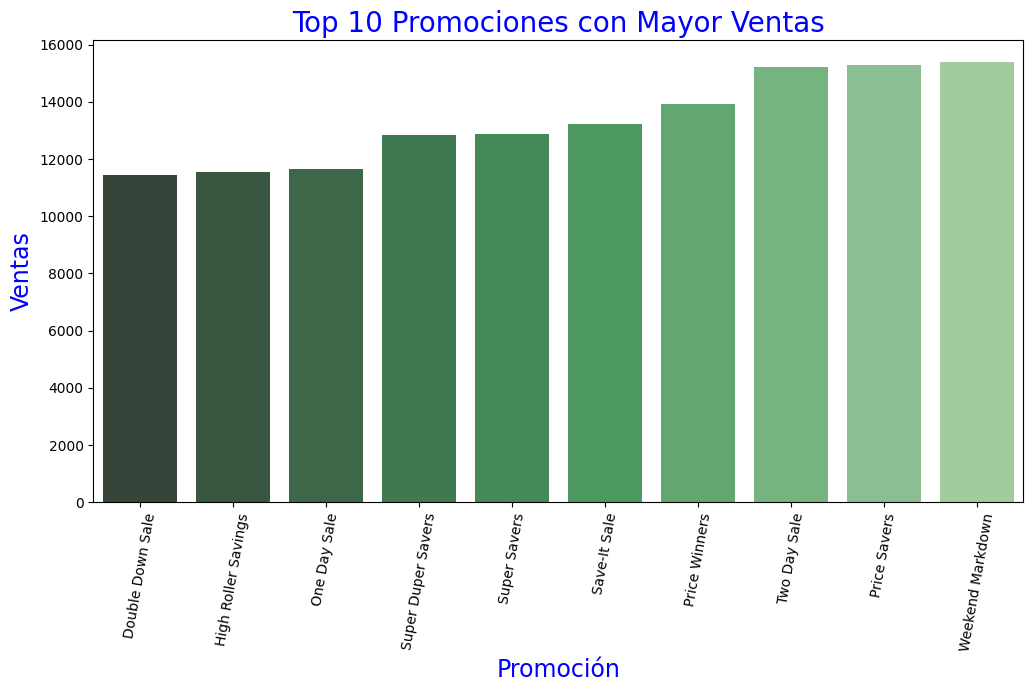

In [150]:
# Obtener el Top 10 de promociones con mayores ventas
top_promotions = sales_by_promotion.nlargest(10, 'store_sales(in millions)')

# Definimos la paleta de colores según la nueva variable del eje y para el Top 10
palette = sns.color_palette("Greens_d", len(top_promotions))

# Ordenamos el tono de la paleta de menor a mayor
rank = top_promotions['store_sales(in millions)'].argsort().argsort()

# Ordenar el Top 10 de menor a mayor por ventas
top_promotions = top_promotions.sort_values('store_sales(in millions)', ascending=True)

# Reasignamos la paleta con los colores ordenados
palette = np.array(palette)[rank]

# Creamos la figura para el gráfico
plt.figure(figsize=(12, 6))

# Creamos el gráfico de barras con el Top 10
sns.barplot(x='promotion_name', y='store_sales(in millions)',data=top_promotions, palette=palette.tolist(), hue='promotion_name', legend=False)

# Configuramos los títulos y etiquetas de los ejes
plt.title('Top 10 Promociones con Mayor Ventas',color='blue', fontsize=20)
plt.xlabel('Promoción',color='blue', fontsize=17)
plt.ylabel('Ventas',color='blue', fontsize=17)

# Rotamos las etiquetas del eje x para mejor visualización
plt.xticks(rotation=80)

# Mostramos el gráfico
plt.show()

En estra representación gráfica se muestran las 10 promociones con mayores ventas

Con ambos gráficos verificar que "Weekend Markdown" tiene un impacto significativamente positivo en las ventas, mientras que otras promociones pueden tener un impacto menor.
Las promociones como por ejemplo Weekend Markdown, Price Savers, Two Day Sale, Price Winners, entre otras cuyas barras están por encima del costo promedio son las más rentables.
Las promociones que estan cerca de la barra promedio requieren mas ajustes para mejorar su rentabilidad.
Las promociones que aparecen en el segundo gráfico son las más exitosas generando mayor impacto lo cuál deberían ser priorizadas en futuras estrategias.

### Ventas-costos de paises

In [31]:
#Agrupamos las ventas de las tiendas por Paises:
country_sales_cost = df.groupby('sales_country')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()
print(country_sales_cost)

  sales_country  store_sales(in millions)  store_cost(in millions)
0        Canada                  26277.08               10523.4346
1        Mexico                 115565.10               46377.6993
2           USA                 253419.22              101387.5648


In [32]:
country_sales_cost.groupby('sales_country').describe().fillna(0)

store_sales(in millions)                                        \
                                 count       mean  std        min        25%   
sales_country                                                                  
Canada                             1.0   26277.08  0.0   26277.08   26277.08   
Mexico                             1.0  115565.10  0.0  115565.10  115565.10   
USA                                1.0  253419.22  0.0  253419.22  253419.22   

                                               store_cost(in millions)  \
                     50%        75%        max                   count   
sales_country                                                            
Canada          26277.08   26277.08   26277.08                     1.0   
Mexico         115565.10  115565.10  115565.10                     1.0   
USA            253419.22  253419.22  253419.22                     1.0   

                                                                        \
                      mean  std          min          25%          50%   
sales_country                                                            
Canada          10523.4346  0.0   10523.4346   10523.4346   10523.4346   
Mexico          46377.6993  0.0   46377.6993   46377.6993   46377.6993   
USA            101387.5648  0.0  101387.5648  101387.5648  101387.5648   

                                         
                       75%          max  
sales_country                            
Canada          10523.4346   10523.4346  
Mexico          46377.6993   46377.6993  
USA            101387.5648  101387.5648

Hacemos el código:

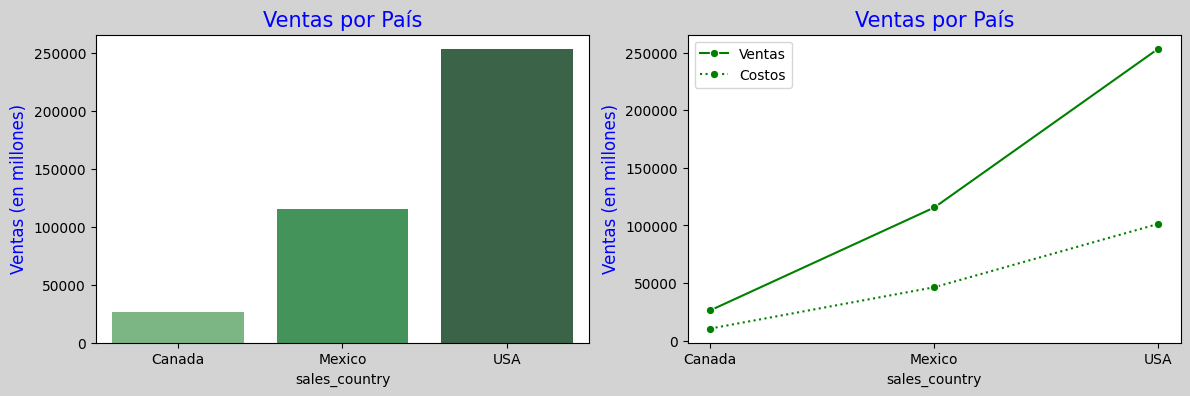

In [149]:
#Establecemos las dimensiones de los graficos y la posición de cada uno con la Herramienta Pyplot de Matplotlip
#Crearemos 3 gráicos diferentes
GF2= fig, axes = plt.subplots(1, 2, figsize=(14, 4))

#Colocamos fondo gris
plt.gcf().set_facecolor('#D3D3D3')


#POSICIÓN 1
#grafico de barras ventas por pais con la lubrería Seaborn
axes1 = sns.barplot(x='sales_country', y='store_sales(in millions)', hue='sales_country', data=country_sales_cost, ax=axes[0], palette='Greens_d', legend=False)
#Edición de titulos y Texto
axes[0].set_title('Ventas por País',color='blue', fontsize=15)
axes[0].set_ylabel('Ventas (en millones)',color='blue', fontsize=12)

#POSICIÓN 2
#Grafico de linease variacion de ventas y costos por pais
axes2=sns.lineplot(x='sales_country', y='store_sales(in millions)', data=country_sales_cost, label='Ventas', marker='o', color='green')
axes2_1=sns.lineplot(x='sales_country', y='store_cost(in millions)', data=country_sales_cost, label='Costos', marker='o', color=('green'), linestyle='dotted')
axes[1].set_title('Ventas por País',color='blue', fontsize=15)
axes[1].set_ylabel('Ventas (en millones)',color='blue', fontsize=12)



GF2=plt.show()

En Estados Unidos las ventas son significativamente más altas que México y Canadá, esto prodria indicar que EEUU tiene una mayor demanda de productos o que la promociones en este país son mas efectivas.
Por otro lado se observa que en los tres paìses tienen rentabilidad, pero canadá tiene altos costos en comparación a las ventas generadas.
EEUU tiene más ventas y por lo tanto mayor costo que los demas países.

### Influencia del nivel educativo en elecciones de supermercados

In [34]:
#Agrupamos las ventas de las tiendas por tipo de tienda:
type_sales_cost = df.groupby('store_type')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()
print(type_sales_cost)

            store_type  store_sales(in millions)  store_cost(in millions)
0   Deluxe Supermarket                 152304.54               61074.9974
1  Gourmet Supermarket                  42974.80               17209.1167
2     Mid-Size Grocery                  18963.35                7602.0270
3        Small Grocery                   6493.96                2596.4851
4          Supermarket                 174524.75               69806.0725


In [35]:
type_sales_cost.groupby('store_type').describe().fillna(0)

store_sales(in millions)                             \
                                       count       mean  std        min   
store_type                                                                
Deluxe Supermarket                       1.0  152304.54  0.0  152304.54   
Gourmet Supermarket                      1.0   42974.80  0.0   42974.80   
Mid-Size Grocery                         1.0   18963.35  0.0   18963.35   
Small Grocery                            1.0    6493.96  0.0    6493.96   
Supermarket                              1.0  174524.75  0.0  174524.75   

                                                                 \
                           25%        50%        75%        max   
store_type                                                        
Deluxe Supermarket   152304.54  152304.54  152304.54  152304.54   
Gourmet Supermarket   42974.80   42974.80   42974.80   42974.80   
Mid-Size Grocery      18963.35   18963.35   18963.35   18963.35   
Small Grocery          6493.96    6493.96    6493.96    6493.96   
Supermarket          174524.75  174524.75  174524.75  174524.75   

                    store_cost(in millions)                               \
                                      count        mean  std         min   
store_type                                                                 
Deluxe Supermarket                      1.0  61074.9974  0.0  61074.9974   
Gourmet Supermarket                     1.0  17209.1167  0.0  17209.1167   
Mid-Size Grocery                        1.0   7602.0270  0.0   7602.0270   
Small Grocery                           1.0   2596.4851  0.0   2596.4851   
Supermarket                             1.0  69806.0725  0.0  69806.0725   

                                                                     
                            25%         50%         75%         max  
store_type                                                           
Deluxe Supermarket   61074.9974  61074.9974  61074.9974  61074.9974  
Gourmet Supermarket  17209.1167  17209.1167  17209.1167  17209.1167  
Mid-Size Grocery      7602.0270   7602.0270   7602.0270   7602.0270  
Small Grocery         2596.4851   2596.4851   2596.4851   2596.4851  
Supermarket          69806.0725  69806.0725  69806.0725  69806.0725

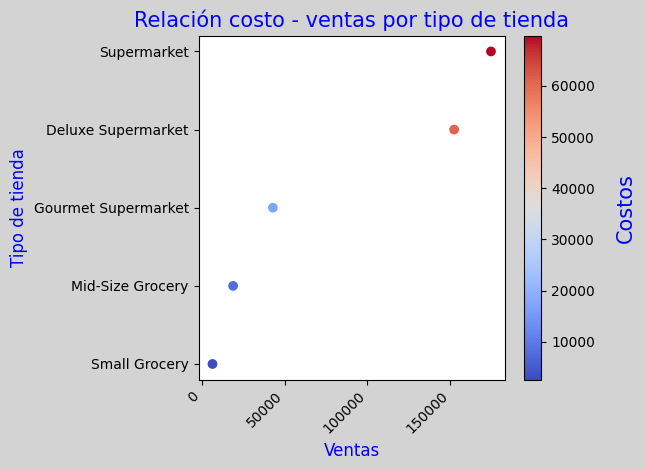

In [144]:
fig, ax = plt.subplots()

# Ordenamos los datos de ventas de menor a mayor
type_sales_cost_sorted = type_sales_cost.sort_values('store_sales(in millions)', ascending=True)

#COlocamos fondo gris
plt.gcf().set_facecolor('#D3D3D3')

# Usamos un gráfico de dispersión con los datos ordenados
paleta_colores = ax.scatter(type_sales_cost_sorted['store_sales(in millions)'],
                            type_sales_cost_sorted['store_type'],
                            c=type_sales_cost_sorted['store_cost(in millions)'],
                            cmap='coolwarm')  # Mapa de colores rojo suave a azul intenso

# Añadimos la barra de colores
cbar_costo = fig.colorbar(paleta_colores, orientation='vertical')
cbar_costo.ax.set_ylabel('Costos', rotation=90, labelpad=15, color='blue', fontsize=15)

# Modificamos los parámetros del gráfico
ax.set_title('Relación costo - ventas por tipo de tienda', color='blue', fontsize=15)
ax.set_xlabel('Ventas', color='blue', fontsize=12)
ax.set_ylabel('Tipo de tienda', color='blue', fontsize=12)

# Rotamos las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Ajustamos el diseño para evitar solapamientos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Esta representación gráfica permite observar como las ventas varian según el tipo de tienda, y además permite a simple vista cuáles tiendas tienen mayor costos.
Hay dos tipos de tienda como Supermarket y Deluxe Supermarket que a pesar de tener altas ventas, también tienen altos costos.

In [37]:
#Agrupamos las ventas de las tiendas por tipo de educación de los usuarios:
education_sales_cost = df.groupby('education')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()
print(education_sales_cost)

             education  store_sales(in millions)  store_cost(in millions)
0     Bachelors Degree                 104179.09               41740.1449
1      Graduate Degree                  19880.73                7957.8046
2   High School Degree                 117959.79               47185.3046
3      Partial College                  34235.70               13707.0960
4  Partial High School                 119006.09               47698.3486


In [38]:
education_sales_cost.groupby('education').describe().fillna(0)

store_sales(in millions)                             \
                                       count       mean  std        min   
education                                                                 
Bachelors Degree                         1.0  104179.09  0.0  104179.09   
Graduate Degree                          1.0   19880.73  0.0   19880.73   
High School Degree                       1.0  117959.79  0.0  117959.79   
Partial College                          1.0   34235.70  0.0   34235.70   
Partial High School                      1.0  119006.09  0.0  119006.09   

                                                                 \
                           25%        50%        75%        max   
education                                                         
Bachelors Degree     104179.09  104179.09  104179.09  104179.09   
Graduate Degree       19880.73   19880.73   19880.73   19880.73   
High School Degree   117959.79  117959.79  117959.79  117959.79   
Partial College       34235.70   34235.70   34235.70   34235.70   
Partial High School  119006.09  119006.09  119006.09  119006.09   

                    store_cost(in millions)                               \
                                      count        mean  std         min   
education                                                                  
Bachelors Degree                        1.0  41740.1449  0.0  41740.1449   
Graduate Degree                         1.0   7957.8046  0.0   7957.8046   
High School Degree                      1.0  47185.3046  0.0  47185.3046   
Partial College                         1.0  13707.0960  0.0  13707.0960   
Partial High School                     1.0  47698.3486  0.0  47698.3486   

                                                                     
                            25%         50%         75%         max  
education                                                            
Bachelors Degree     41740.1449  41740.1449  41740.1449  41740.1449  
Graduate Degree       7957.8046   7957.8046   7957.8046   7957.8046  
High School Degree   47185.3046  47185.3046  47185.3046  47185.3046  
Partial College      13707.0960  13707.0960  13707.0960  13707.0960  
Partial High School  47698.3486  47698.3486  47698.3486  47698.3486

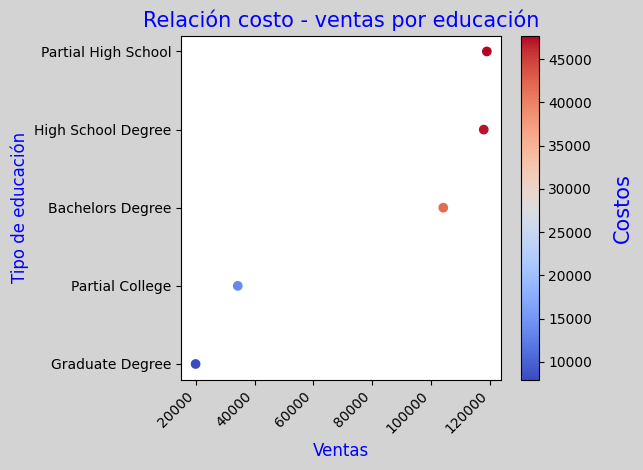

In [145]:
#Repetimos los mismos pasos del grafico anterior pero con el nuevo grupo por educación:
fig, ax = plt.subplots()

# Ordenamos los datos de ventas de menor a mayor
education_sales_cost_sorted = education_sales_cost.sort_values('store_sales(in millions)', ascending=True)

#Colocamos fondo gris
plt.gcf().set_facecolor('#D3D3D3')

# Usamos un gráfico de dispersión con los datos ordenados
paleta_colores2 = ax.scatter(education_sales_cost_sorted['store_sales(in millions)'],
                             education_sales_cost_sorted['education'],
                             c=education_sales_cost_sorted['store_cost(in millions)'],
                             cmap='coolwarm')  # Mapa de colores rojo suave a azul intenso

# Añadimos la barra de colores
cbar_costo2 = fig.colorbar(paleta_colores2, orientation='vertical')
cbar_costo2.ax.set_ylabel('Costos', rotation=90, labelpad=15, color='blue', fontsize=15)

# Modificamos los parámetros del gráfico
ax.set_title('Relación costo - ventas por educación', color='blue', fontsize=15)
ax.set_xlabel('Ventas', color='blue', fontsize=12)
ax.set_ylabel('Tipo de educación', color='blue', fontsize=12)

# Rotamos las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Ajustamos el diseño para evitar solapamientos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

El gráfico permite observar cómo varían las ventas en función del nivel educativo de los clientes. Se identifica que los clientes con una licenciatura o carrera de grado  generan más ventas pero a su vez los clientes que no terminaron la escuela secundaria tambien tiene una tendencia alta en ventas y con altos costos.

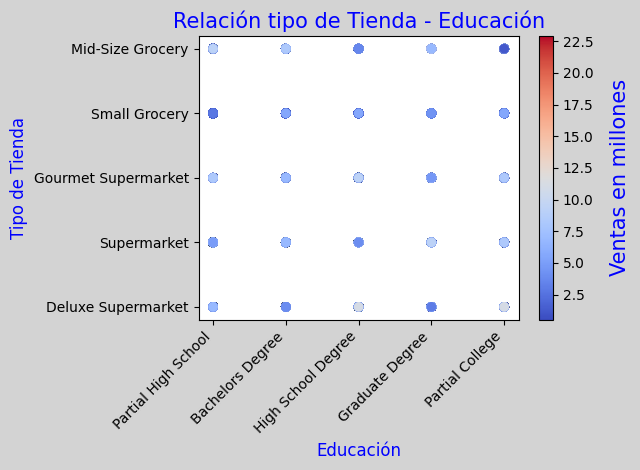

In [146]:
#A continuación usamos el Dataframe original (df) para relacionar las ventas con educación y tipo de tienda
#Repetimos los pasos del gráfico anterior
fig, ax = plt.subplots()

#Colocamos fondo gris
plt.gcf().set_facecolor('#D3D3D3')

paleta_colores3 = ax.scatter(df['education'], df['store_type'],c=df['store_sales(in millions)'], cmap='coolwarm')
cbar=fig.colorbar(paleta_colores3, orientation='vertical')
cbar.ax.set_ylabel('Ventas en millones', rotation=90, labelpad=12, color='blue', fontsize=15)
ax.set_title('Relación tipo de Tienda - Educación',color='blue', fontsize=15)
ax.set_xlabel('Educación',color='blue', fontsize=12)
ax.set_ylabel('Tipo de Tienda', color='blue', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

La gráfica nos permite ver como varían las ventas según el tipo de tienda y el nivel educativo. Por lo que podemos identificar que los clientes que tienen titulo secundario o cursan la universidad prefieren las tiendas de tipo Deluxe Supermarket.

### Mediana costo-ventas por género

In [41]:
df[['gender', 'cost']]

,gender,cost
0,F,126.62
1,M,59.86
2,F,84.16
3,F,95.78
4,M,50.79
...,...,...
60423,F,95.25
60424,F,69.42
60425,M,67.51
60426,M,132.88


In [42]:
# Agrupamos costo total y genero para luego poder obtener la suma y la mediana
Mediana_Costo = df.groupby('gender')['cost'].sum().reset_index()
print(Mediana_Costo)

  gender        cost
0      F  3079175.00
1      M  2919051.26


In [43]:
# Definimos cuartiles para poder graficarlos.
cuartiles = df.groupby('gender')['cost'].describe()

# Cuartiles
print(cuartiles[['25%', '50%', '75%']])

          25%    50%     75%
gender                      
F       70.32  97.34  126.62
M       69.63  98.81  126.24


In [147]:
# Creamos grafico de costo total por genero.

fig = px.box(df,
             x='gender',
             y='cost',
             color='gender',
             color_discrete_map={'M': 'blue', 'F': 'pink'},# Color asignado segun genero
             category_orders={'gender': ['F', 'M']},  # Orden de las categorías
             title='Costo Total por Género')


fig.show()

<Figure size 640x480 with 0 Axes>

In [45]:
# Verificacion de los datos mostrados en grafico, calculamos la suma y le

print(df.groupby('gender')['cost'].sum()) #Suma de costos
print(df.groupby('gender')['cost'].median()) # Mediana de costos

gender
F    3079175.00
M    2919051.26
Name: cost, dtype: float64
gender
F    97.34
M    98.81
Name: cost, dtype: float64


Esta representación gráfica de tipo boxplot visualiza el costo total por género, y podemos observar en ella como la mediana, así como los valores máximos y minimos no presentan más que una difencia muy mínima y nada significante.

### Tendencias en clientes solteros en comidas congeladas.

In [46]:
# Filtramos DF por comidas congeladas "Frozen Foods"
df_frozen_food = df[df['food_department'] == 'Frozen Foods']
print(df_frozen_food)

         food_category food_department food_family  store_sales(in millions)  \
0      Breakfast Foods    Frozen Foods        Food                      7.36   
1      Breakfast Foods    Frozen Foods        Food                      5.52   
2      Breakfast Foods    Frozen Foods        Food                      3.68   
3      Breakfast Foods    Frozen Foods        Food                      3.68   
4      Breakfast Foods    Frozen Foods        Food                      4.08   
...                ...             ...         ...                       ...   
60198  Breakfast Foods    Frozen Foods        Food                      2.26   
60199  Breakfast Foods    Frozen Foods        Food                      1.16   
60200  Breakfast Foods    Frozen Foods        Food                      3.78   
60201  Breakfast Foods    Frozen Foods        Food                      2.52   
60202  Breakfast Foods    Frozen Foods        Food                      9.44   

       store_cost(in millions) unit_sal

In [47]:
# Agrupamos los datos por estado civil y sumamos las ventas de comida congelada
venta_estado_civil = df_frozen_food.groupby('marital_status')['store_sales(in millions)'].sum().reset_index()
print(venta_estado_civil)

  marital_status  store_sales(in millions)
0              M                  19549.80
1              S                  19505.31


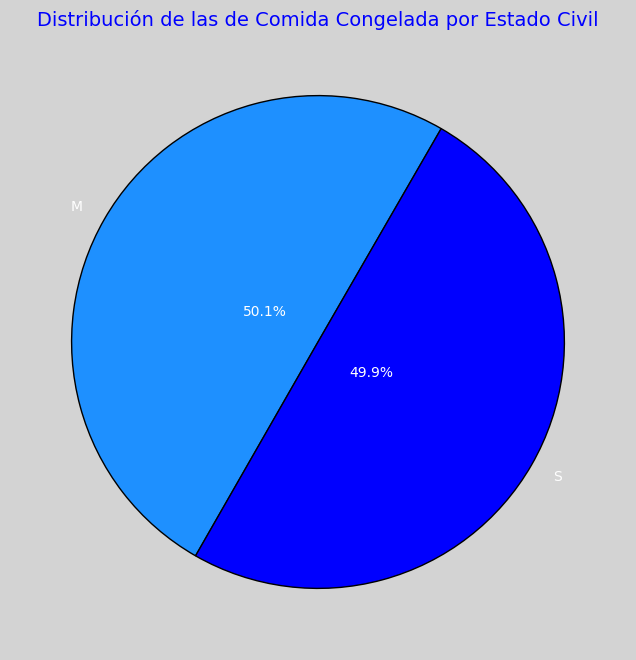

In [139]:
# Creamos el gráfico de torta
plt.figure(figsize=(8, 8))

# Colocamos un fondo gris claro
plt.gcf().set_facecolor('#D3D3D3')
plt.gca().set_facecolor('#D3D3D3')

# Definimos el gráfico de torta con el borde negro en cada sección
plt.pie(venta_estado_civil['store_sales(in millions)'],
        labels=venta_estado_civil['marital_status'],
        autopct='%1.1f%%',
        startangle=60,
        colors=['#1E90FF', '#0000FF', '#32CD32', '#228B22'],  # Azul y verde
        pctdistance=0.25,  # Ajustamos la posición de los porcentajes
        textprops={'color': 'white'},  # Cambiamos el color del texto de los porcentajes a negro
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Resaltamos el borde de la torta en negro
        )

# Título
plt.title('Distribución de las de Comida Congelada por Estado Civil', color='blue', fontsize=14)
plt.show()

In [49]:
# Verificamos que los valores en el grafico sean correctos, calculamos ventas de alimentos congelados segun estado civil.
print(venta_estado_civil)

  marital_status  store_sales(in millions)
0              M                  19549.80
1              S                  19505.31


En esta representación gràfica podemos observar que no hay relación alguna entre el estado civil de los clientes con el tipo de producto. Ya que la tendencia es mínima e incluso se verifica que los clientes solteros consumen menos que los casados productos congelados.

### Tendencias de ventas por marcas

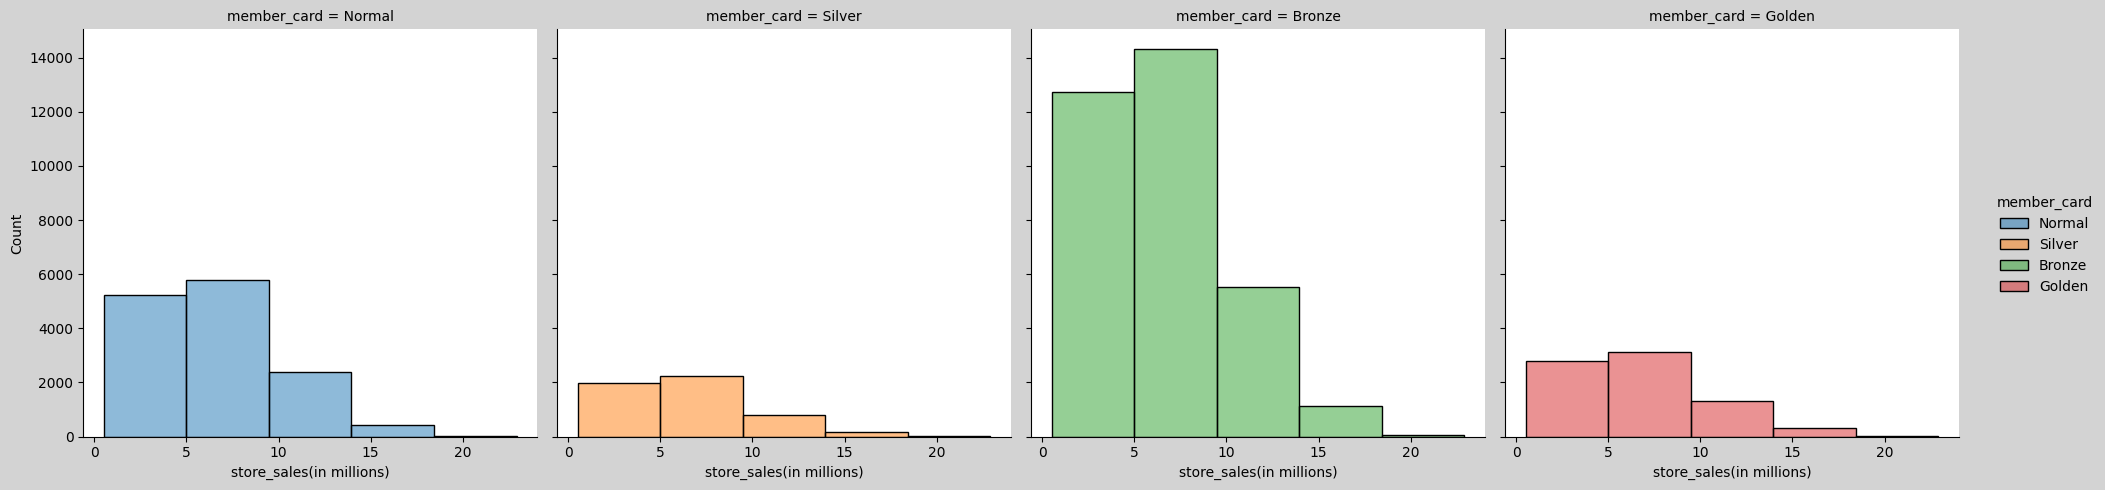

In [148]:
sns.displot(data=df, x="store_sales(in millions)", hue="member_card",col="member_card",bins=5, kde=False)

#Colocamos fondo gris
plt.gcf().set_facecolor('#D3D3D3')


Con estás gráficas podemos visualizar como las ventas se distribuyen para cada tipo de tarjeta. Observamos que los clientes con tarjetas bronze tienden a gastar más.